# Principal Component Analysis:
## Topic: Carbon Nanotubes
### Student: Kaleb Alfaro Badilla
### Dataset: https://archive.ics.uci.edu/ml/datasets/Carbon+Nanotubes#

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv"

# load dataset into Pandas DataFrame
features=['n','m','Ini_u','Ini_v','Ini_w','u','v','w']
df = pd.read_csv(url, skiprows=1 ,names=features,sep=';')
print(df.loc[:10,:])
# Data is viewed as strings

    n  m     Ini_u     Ini_v     Ini_w         u         v         w
0   2  1  0,679005  0,701318  0,017033  0,721039  0,730232  0,017014
1   2  1  0,717298  0,642129  0,231319  0,738414   0,65675  0,232369
2   2  1  0,489336  0,303751  0,088462  0,477676  0,263221  0,088712
3   2  1  0,413957  0,632996  0,040843  0,408823  0,657897  0,039796
4   2  1  0,334292  0,543401   0,15989  0,303349  0,558807  0,157373
5   2  1  0,510664  0,696249  0,255128  0,496977  0,725608   0,25597
6   2  1  0,413957  0,632996  0,374176  0,390878  0,657645  0,374735
7   2  1  0,712552   0,55479  0,112271  0,750056  0,561494  0,114944
8   2  1  0,320995  0,298682    0,1837  0,281301  0,261433  0,182779
9   2  1  0,394742  0,279367  0,302747   0,35086    0,2335  0,302196
10  2  1  0,282702  0,357871  0,397985  0,229138  0,328729  0,398581


In [2]:
# Code strings to numbers
# Map ',' to '.' as follows 0,12313 --> 0.12313 
for f in features:
    if f in features[2:]: # n,m are integers
        df.loc[:,f]=[float(x.replace(',','.')) for x in df.loc[:,f].values]
    else:
        df.loc[:,f]=[float(x) for x in df.loc[:,f].values]
# Data sorted
print(df.loc[:10,:])

    n  m     Ini_u     Ini_v     Ini_w         u         v         w
0   2  1  0.679005  0.701318  0.017033  0.721039  0.730232  0.017014
1   2  1  0.717298  0.642129  0.231319  0.738414  0.656750  0.232369
2   2  1  0.489336  0.303751  0.088462  0.477676  0.263221  0.088712
3   2  1  0.413957  0.632996  0.040843  0.408823  0.657897  0.039796
4   2  1  0.334292  0.543401  0.159890  0.303349  0.558807  0.157373
5   2  1  0.510664  0.696249  0.255128  0.496977  0.725608  0.255970
6   2  1  0.413957  0.632996  0.374176  0.390878  0.657645  0.374735
7   2  1  0.712552  0.554790  0.112271  0.750056  0.561494  0.114944
8   2  1  0.320995  0.298682  0.183700  0.281301  0.261433  0.182779
9   2  1  0.394742  0.279367  0.302747  0.350860  0.233500  0.302196
10  2  1  0.282702  0.357871  0.397985  0.229138  0.328729  0.398581


In [3]:
# Now is proceeded to realize an standard distribution for each feature
from sklearn.preprocessing import StandardScaler
# Features vector 
x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)
print(x[:5,:])

[[-2.9108229  -1.38804248  0.62455356  0.7024735  -1.67286691  0.75956878
   0.79093262 -1.67018766]
 [-2.9108229  -1.38804248  0.75820646  0.4958672  -0.93007977  0.81929283
   0.53841568 -0.92522364]
 [-2.9108229  -1.38804248 -0.03744238 -0.68528181 -1.42527004 -0.0769564
  -0.81392559 -1.42216727]
 [-2.9108229  -1.38804248 -0.30053541  0.46398737 -1.59033347 -0.31362865
   0.54235728 -1.59137932]
 [-2.9108229  -1.38804248 -0.57858774  0.15124527 -1.17767664 -0.6761803
   0.20183982 -1.18465259]]


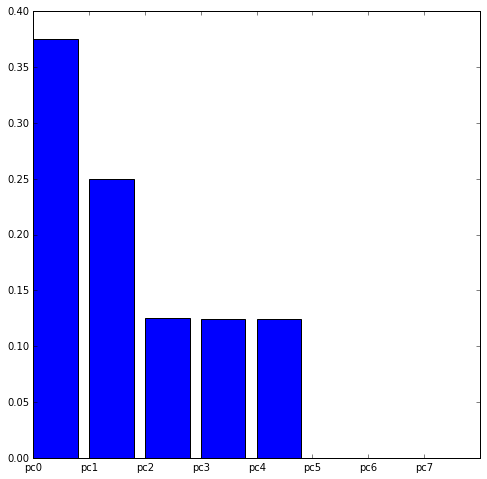

In [4]:
# Finally is proceeded to compute PCA
n_components = 8
pca_features = ['pc'+str(i) for i in range(n_components)]
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ind = range(1,n_components+1)
ax.bar(ind,pca.explained_variance_ratio_)
ax.set_xticks(ind)
ax.set_xticklabels(pca_features)
plt.show()

Notice that 3 Principal componentes removed, so the dimencionality of the data set reduces from 8 to 5